In [3]:
import cv2
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

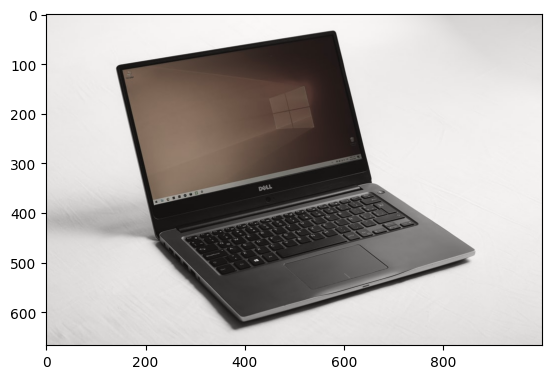

In [4]:
img = cv2.imread("imagedata/training/laptop/1.jpg")
plt.imshow(img)

In [5]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [6]:
train_dataset = train.flow_from_directory('imagedata/training',target_size=(200,200),batch_size=3,class_mode="binary")
validation_dataset = validation.flow_from_directory('imagedata/validation',target_size=(200,200),batch_size=3,class_mode="binary")

Found 2124 images belonging to 2 classes.
Found 518 images belonging to 2 classes.


In [7]:
train_dataset.class_indices

{'laptop': 0, 'mobile': 1}

In [9]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape = (200,200,3)), 
                            tf.keras.layers.MaxPool2D(2,2),
                            
                            tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                            tf.keras.layers.MaxPool2D(2,2),
                            
                            tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                            tf.keras.layers.MaxPool2D(2,2),
                            
                            tf.keras.layers.Flatten(),
                            
                            tf.keras.layers.Dense(512,activation='relu'),
                            
                            tf.keras.layers.Dense(1,activation='sigmoid')
                            ])

d:\Python\Internship\internship\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(loss = 'binary_crossentropy',
            #   optimizer= RMSprop(learning_rate = 0.001),
              optimizer = 'adam', 
              metrics=['accuracy'])


In [12]:
history = model.fit(train_dataset,steps_per_epoch=3, epochs=30, 
                    validation_data= validation_dataset)

Epoch 1/30


d:\Python\Internship\internship\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.8194 - loss: 0.3545 - val_accuracy: 0.9307 - val_loss: 5.2961
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 877ms/step - accuracy: 1.0000 - loss: 2.2519e-20 - val_accuracy: 0.9307 - val_loss: 8.9432
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 863ms/step - accuracy: 1.0000 - loss: 1.0583e-30 - val_accuracy: 0.9307 - val_loss: 11.9787
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 866ms/step - accuracy: 1.0000 - loss: 5.5922e-36 - val_accuracy: 0.9307 - val_loss: 14.4638
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 881ms/step - accuracy: 0.7222 - loss: 53.0168 - val_accuracy: 0.9307 - val_loss: 5.1311
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 882ms/step - accuracy: 1.0000 - loss: 6.3971e-10 - val_accuracy: 0.9307 - val_loss: 1.2080
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 884ms/step - accuracy: 1.0000 - loss: 0.0049 - val_accuracy: 0.8355 - val_loss: 0.5087
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 871ms/step - accuracy: 1.0000 - loss: 0.3667 - val_accuracy: 0.9307 - val_

C:\Users\patel\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 1.0000 - loss: 0.0515 - val_accuracy: 0.9437 - val_loss: 0.1509
Epoch 27/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 969ms/step - accuracy: 1.0000 - loss: 0.0106 - val_accuracy: 0.9481 - val_loss: 0.2249
Epoch 28/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 866ms/step - accuracy: 0.9444 - loss: 0.2657 - val_accuracy: 0.9437 - val_loss: 0.1479
Epoch 29/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 863ms/step - accuracy: 0.8194 - loss: 0.2557 - val_accuracy: 0.9264 - val_loss: 0.2250
Epoch 30/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 863ms/step - accuracy: 0.7222 - loss: 0.4499 - val_accuracy: 0.9221 - val_loss: 0.2564


In [1]:
def predict_image(image_path, model):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(200, 200))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    if prediction < 0.5:
        return 'Mobile'
    else:
        return 'Laptop'
    
new_image_path = 'imagedata/testing/laptop/7.jpg'
print(predict_image(new_image_path, model))

NameError: name 'model' is not defined